imports and prepare data

In [1]:
from sklearn import tree

In [2]:
from functions import *
from split_to_series import *
from build_boards_to_file import *

In [3]:
SIZE = 5
AMOUNT_BOARDS = 10000
AMOUNT_MOVES = 50
NUM_DICT = 1
IGNORE_RANGE = 5

In [4]:
# #build board to file

# # Delete the previous images
# if os.path.isdir(PATH_BOARDS[:-1]):
#     shutil.rmtree(PATH_BOARDS[:-1])
# os.mkdir(PATH_BOARDS[:-1])

# # make directions for boards
# for i in range(NUM_DICT):
#     os.mkdir(PATH_BOARDS + str(i))

# # fill the files with boards
# for i in range(AMOUNT_BOARDS):
#     print_numbers(i)
#     name = f"{SIZE}-{str(i)}-{AMOUNT_MOVES}boards.bnr"
#     board, amount_boards = create_board(i, SIZE, AMOUNT_MOVES)
#     with open(PATH_BOARDS + str(i % NUM_DICT) + "\\" + name, 'wb') as f:
#         # f.write(bytes(amount_boards))
#         f.write(bytes(board))

In [5]:
def split_boards(boards, amount, ignore_range, amount_board_in_series):
        if len(boards)>ignore_range:
                boards = boards[ignore_range:]
                if boards[amount - ignore_range - 1]  in boards[:amount-ignore_range-1]: # there is loop
                        boards, amount  = delete_repeat(boards, len(boards))
                #after we delete the repeat boards, we split the board to series
                return [(boards[i:i + amount_board_in_series]) for i in range(len(boards) - amount_board_in_series + 1)]
        else:
                return []

In [6]:
def split_board_to_series(size, amount_boards, amount_moves, num_dict, amount_board_in_series, ignore_range):
    series = []
    for i in range(amount_boards):
        print_numbers(i)

        # path to read
        path_file = path(size, i, amount_moves, num_dict)
        # read the file
        boards_game, amount_boards_of_game = read_file_to_list(path_file, size * size)
        
        splited_boards = split_boards(boards_game, amount_boards_of_game, ignore_range, amount_board_in_series)
        series += splited_boards
    return series

In [7]:
print(SIZE, AMOUNT_BOARDS, AMOUNT_MOVES, NUM_DICT, 2)
data = split_board_to_series(SIZE, AMOUNT_BOARDS, AMOUNT_MOVES, NUM_DICT, 2, IGNORE_RANGE)    

5 10000 50 1 2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 
151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 
251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 27

In [8]:
print(len(data))

41459


In [9]:
data[:5]

['0000111000000001100000001', '0000110000000001000000001']

In [10]:
data.sort(key=lambda x: x[0])

In [11]:
data[:5]

[['0000000000000000000000001', '0000000000000000000000000'],
 ['0000000000000000000000001', '0000000000000000000000000'],
 ['0000000000000000000000001', '0000000000000000000000000'],
 ['0000000000000000000000001', '0000000000000000000000000'],
 ['0000000000000000000000001', '0000000000000000000000000']]

In [12]:
unique_list = []
prev_first_item = None
for i, item in enumerate(data):
    # print_numbers(i)
    if item[0] != prev_first_item:  # Check if the first item of the current item is different from the previous one
        unique_list.append(item)
    prev_first_item = item[0]

In [13]:
len(unique_list)

29757

In [14]:
df = unique_list

In [15]:
df

[['0000000000000000000000001', '0000000000000000000000000'],
 ['0000000000000000000000010', '0000000000000000000000000'],
 ['0000000000000000000000011', '0000000000000000000000000'],
 ['0000000000000000000000100', '0000000000000000000000000'],
 ['0000000000000000000000101', '0000000000000000000000000'],
 ['0000000000000000000000110', '0000000000000000000000000'],
 ['0000000000000000000000111', '0001000000000000001000010'],
 ['0000000000000000000001000', '0000000000000000000000000'],
 ['0000000000000000000001001', '0000000000000000000000000'],
 ['0000000000000000000001010', '0000000000000000000000000'],
 ['0000000000000000000001011', '0000000000000000000000000'],
 ['0000000000000000000001100', '0000000000000000000000000'],
 ['0000000000000000000001101', '0000000000000000000000000'],
 ['0000000000000000000001110', '0010000000000000010000100'],
 ['0000000000000000000001111', '0011000000000000011000110'],
 ['0000000000000000000010000', '0000000000000000000000000'],
 ['000000000000000000001

In [44]:
df[:5]

[['0000000000000000000000001', '0000000000000000000000000'],
 ['0000000000000000000000010', '0000000000000000000000000'],
 ['0000000000000000000000011', '0000000000000000000000000'],
 ['0000000000000000000000100', '0000000000000000000000000'],
 ['0000000000000000000000101', '0000000000000000000000000']]

In [45]:
df[29750:29756]

[['1111111111100110000010011', '0000000000000000000000000'],
 ['1111111111110000000000000', '0000000000000100000011111'],
 ['1111111111110010000011001', '0000000000000000000000000'],
 ['1111111111111000000011100', '0000000000000000000000000'],
 ['1111111111111110000000000', '0000000000000001111111111'],
 ['1111111111111110000011111', '0000000000000000000000000']]

In [16]:
X_train ,X_test, y_train, y_test = prepare_data(df, 0.1)

0 
1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 0 
1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 

In [17]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

26781
26781
2976
2976


In [18]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)

print(dt.tree_.node_count, dt.tree_.max_depth)
train_test_full_error

1421 21


,train,test
accuracy,1.0,0.985887
precision,1.0,0.974948
recall,1.0,0.981092
f1,1.0,0.978010


In [19]:
dt.tree_

In [20]:
dec_tree(X_train,y_train, X_test, y_test, 9 ,42)

647 9


(DecisionTreeClassifier(max_depth=9, random_state=42),
               train      test
 accuracy   0.978193  0.975470
 precision  0.961697  0.959248
 recall     0.971051  0.964286
 f1         0.966352  0.961760)

In [21]:
import pickle
import json

In [22]:
# pickle.dumps(dt,)
# json.dumps()

In [23]:
def dec_tree(X_train,y_train, X_test, y_test, md ,rs):
    """_summary_

    Args:
        X_train (list): 
        y_train (list): 
        X_test (list): 
        y_test (list): 
        md (int): max depth
        rs (int): random state
    """
    dt = tree.DecisionTreeClassifier(max_depth = md, random_state=rs)
    dt = dt.fit(X_train, y_train)

    # The error on the training and test data sets
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                    measure_error(y_test, y_test_pred, 'test')],
                                    axis=1)

    return dt, dt.tree_.node_count, dt.tree_.max_depth, train_test_full_error

In [24]:
dt, node_count, max_depth, train_test_full_error = dec_tree(X_train,y_train, X_test, y_test, 10, 42)
print(dt)
print(node_count, max_depth)
print(train_test_full_error)

DecisionTreeClassifier(max_depth=10, random_state=42)
747 10
              train      test
accuracy   0.984243  0.979167
precision  0.979006  0.971398
recall     0.971978  0.963235
f1         0.975479  0.967300


In [25]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(df, file)

In [26]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [27]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
train_test_full_error

,train,test
accuracy,0.984243,0.979167
precision,0.979006,0.971398
recall,0.971978,0.963235
f1,0.975479,0.967300


In [28]:
depth_to_check = [4,5,6,7,8,9,10,15,20,30,50,100]

for i in depth_to_check:
    dt, node_count, max_depth, train_test_full_error  = dec_tree(X_train,y_train, X_test, y_test, i, 42)
    
    name_file = f"decision_tree_model_{str(i)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    
    print(node_count, max_depth)
    print(train_test_full_error)

31 4
              train      test
accuracy   0.725701  0.735887
precision  0.601479  0.616573
recall     0.442682  0.461134
f1         0.510005  0.527644
63 5
              train      test
accuracy   0.737351  0.742272
precision  0.693759  0.705100
recall     0.332098  0.334034
f1         0.449178  0.453314
123 6
              train      test
accuracy   0.765393  0.771841
precision  0.682885  0.693617
recall     0.508685  0.513655
f1         0.583051  0.590223
235 7
              train      test
accuracy   0.795377  0.797379
precision  0.700457  0.694537
recall     0.638490  0.654412
f1         0.668040  0.673878
417 8
              train      test
accuracy   0.866958  0.867272
precision  0.803663  0.798499
recall     0.777327  0.782563
f1         0.790276  0.790451
647 9
              train      test
accuracy   0.978193  0.975470
precision  0.961697  0.959248
recall     0.971051  0.964286
f1         0.966352  0.961760
747 10
              train      test
accuracy   0.984243  0.979167

In [29]:
with open('decision_tree_model_10.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [30]:
tree_text = tree.export_text(loaded_model)
print("Decision Tree Structure:\n", tree_text)

Decision Tree Structure:
 |--- feature_0 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_20 <= 0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_17 >  0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_22 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   | 

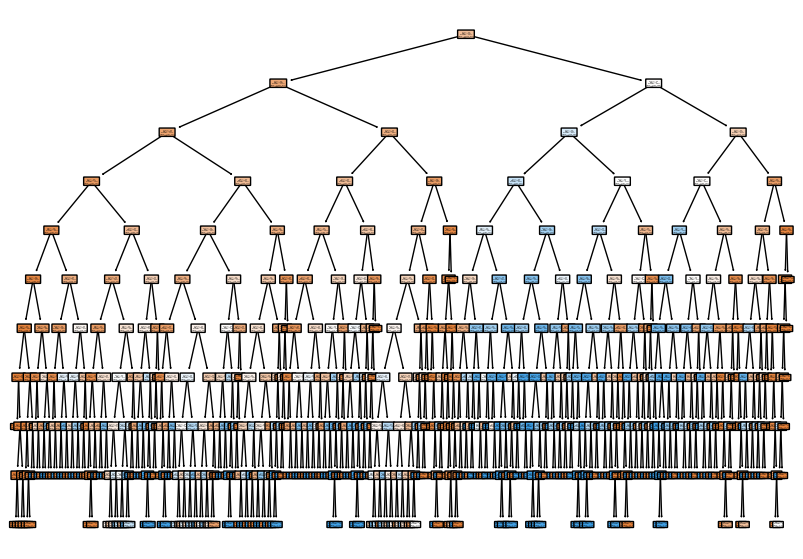

In [31]:
plt.figure(figsize=(10, 7))
tree.plot_tree(loaded_model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [32]:
y_train_pred = loaded_model.predict(X_train)
y_test_pred = loaded_model.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
print(node_count, max_depth)
train_test_full_error

1421 21


,train,test
accuracy,0.984243,0.979167
precision,0.979006,0.971398
recall,0.971978,0.963235
f1,0.975479,0.967300


In [33]:
reverse_df = [line[::-1] for line in df]
X_train_r ,X_test_r, y_train_r, y_test_r = prepare_data(reverse_df, 0.1)

0 
1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 0 
1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 

In [34]:
len(reverse_df)

29757

In [35]:
len(X_train_r)

26781

In [36]:
depth_to_check = [4,5,6,7,8,9,10,15,20,30,50,100]

for i in depth_to_check:
    dec_tree(X_train_r, y_train_r,X_test_r, y_test_r, i ,42)